# Assignment 1
## Jonatan Frykmer & Vincent Honar

In [1]:
from __future__ import print_function

!python --version

import numpy as np
print('numpy:', np.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib as plt
print('matplotlib:', plt.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

import IPython
print('IPython:', IPython.__version__)

import seaborn as sns
print('Seaborn:',sns.__version__)

import pandas as pd 

from sklearn import preprocessing

Python 3.9.12
numpy: 1.21.5
scipy: 1.7.3
matplotlib: 3.5.1
scikit-learn: 1.0.2
IPython: 8.3.0
Seaborn: 0.11.2


# Exploration

In [2]:
df = pd.read_csv("spambase.data")
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [3]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


All rows are mostly dominated by rows containing 0

In [4]:
df.duplicated().value_counts() #Gives a true or false value for each row based on whether a previous sample contains the exact same values.
# value_counts sums up the number of duplicates in the true column
df.drop_duplicates(inplace = True)

Duplicates are dropped before doing any deeper examination of the data

feature:  word_freq_make


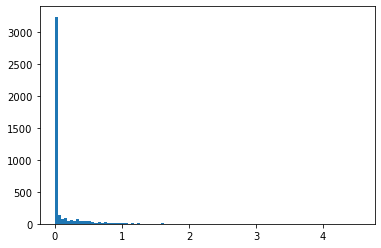

feature:  word_freq_address


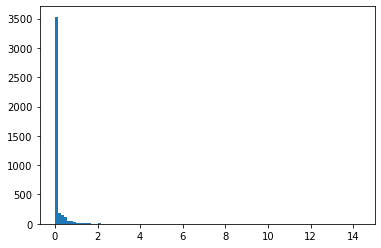

feature:  word_freq_all


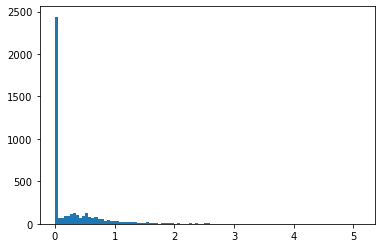

feature:  word_freq_3d


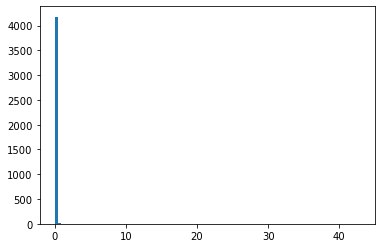

feature:  word_freq_our


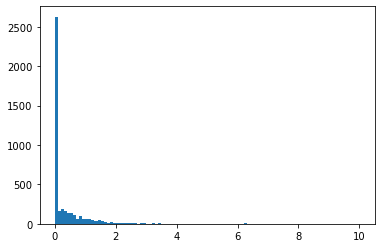

feature:  word_freq_over


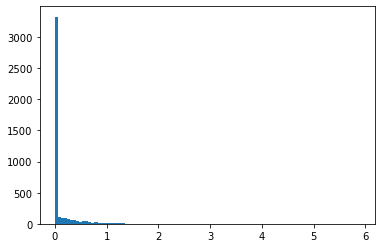

feature:  word_freq_remove


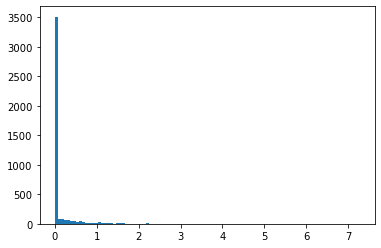

feature:  word_freq_internet


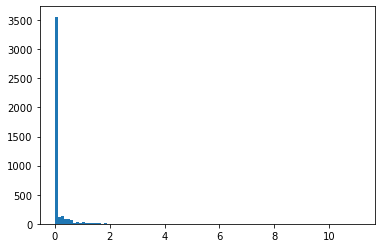

feature:  word_freq_order


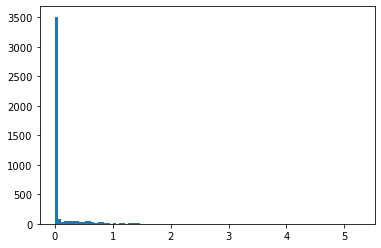

feature:  word_freq_mail


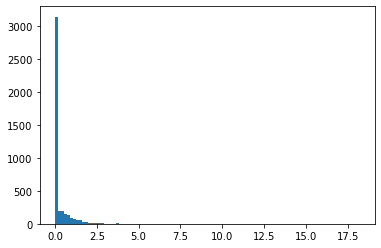

feature:  word_freq_receive


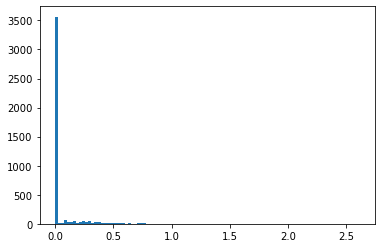

feature:  word_freq_will


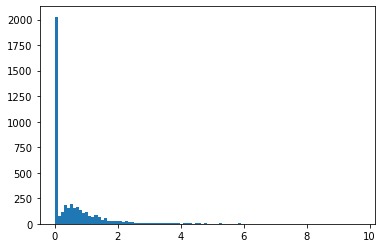

feature:  word_freq_people


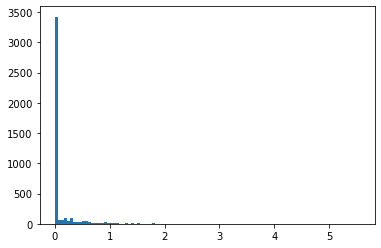

feature:  word_freq_report


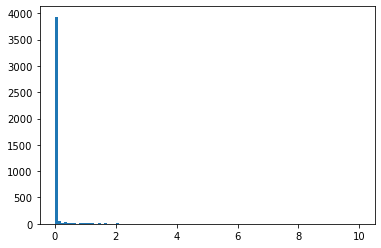

feature:  word_freq_addresses


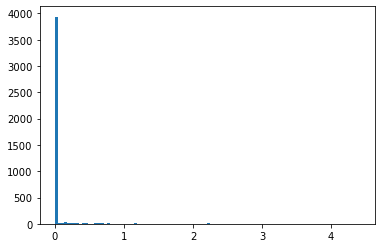

feature:  word_freq_free


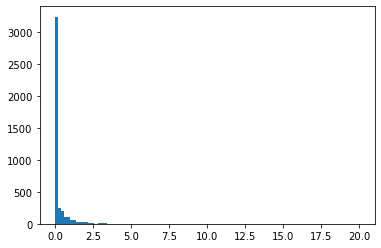

feature:  word_freq_business


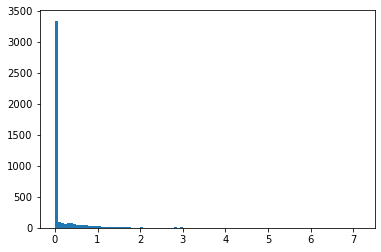

feature:  word_freq_email


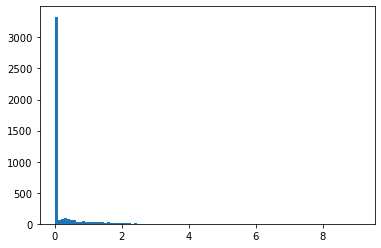

feature:  word_freq_you


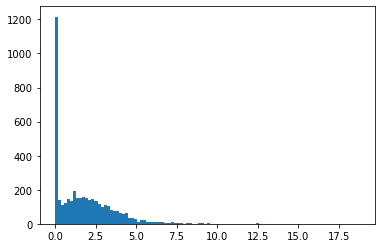

feature:  word_freq_credit


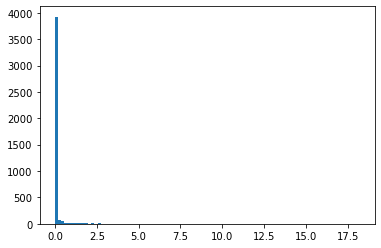

feature:  word_freq_your


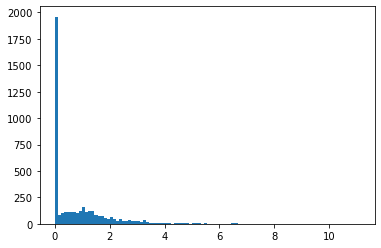

feature:  word_freq_font


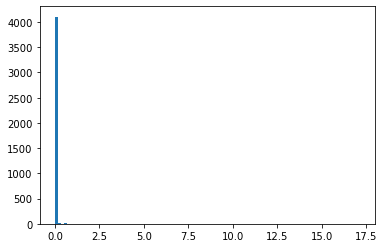

feature:  word_freq_000


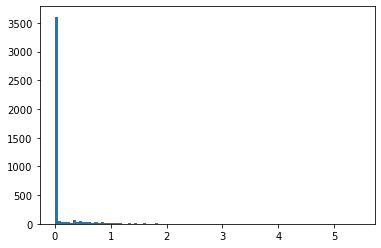

feature:  word_freq_money


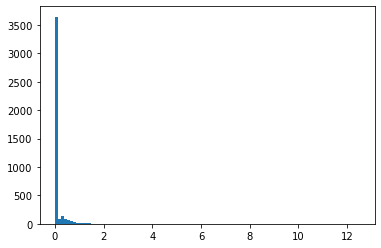

feature:  word_freq_hp


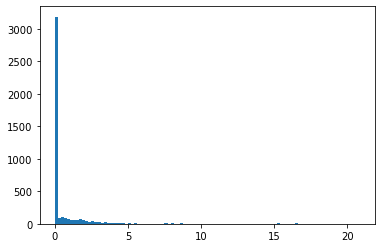

feature:  word_freq_hpl


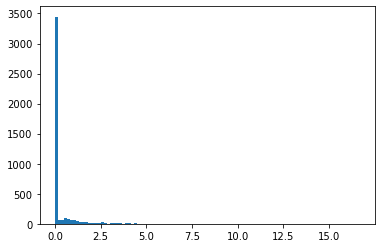

feature:  word_freq_george


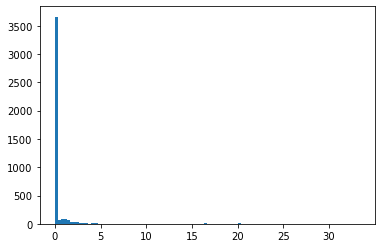

feature:  word_freq_650


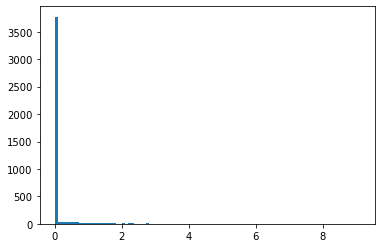

feature:  word_freq_lab


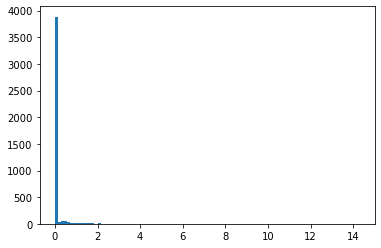

feature:  word_freq_labs


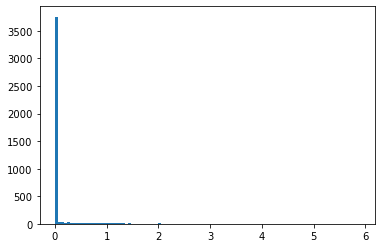

feature:  word_freq_telnet


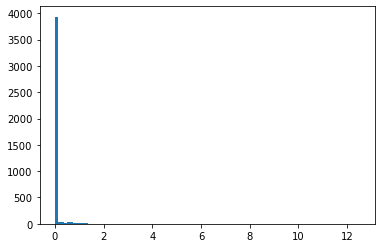

feature:  word_freq_857


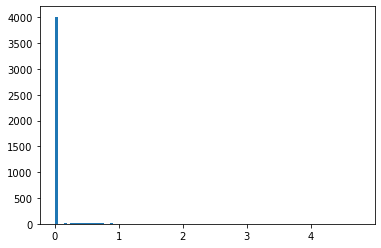

feature:  word_freq_data


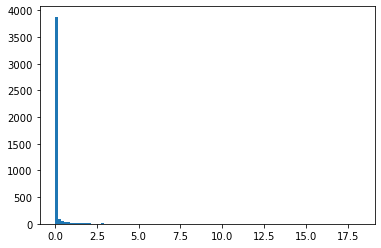

feature:  word_freq_415


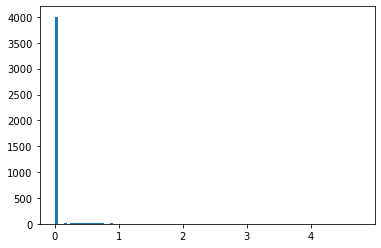

feature:  word_freq_85


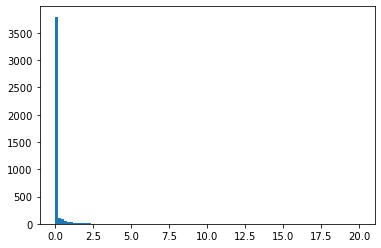

feature:  word_freq_technology


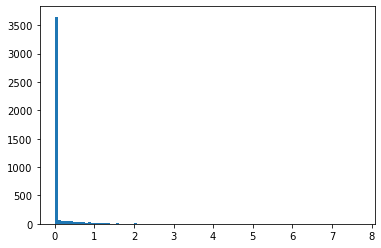

feature:  word_freq_1999


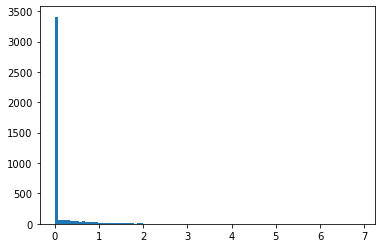

feature:  word_freq_parts


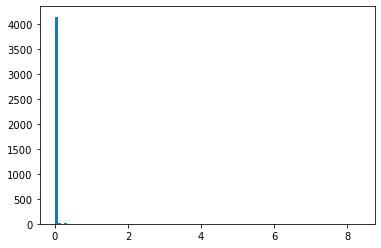

feature:  word_freq_pm


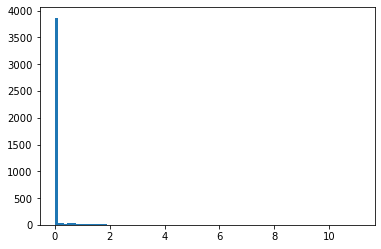

feature:  word_freq_direct


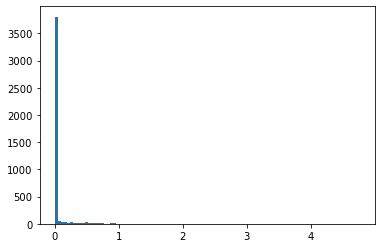

feature:  word_freq_cs


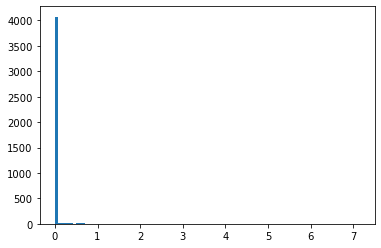

feature:  word_freq_meeting


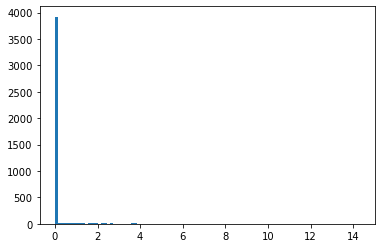

feature:  word_freq_original


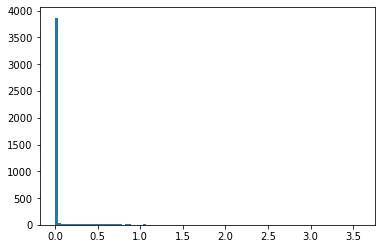

feature:  word_freq_project


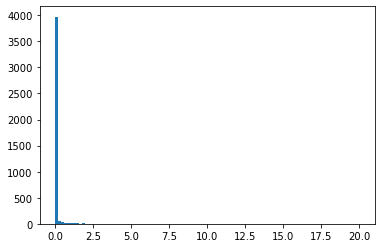

feature:  word_freq_re


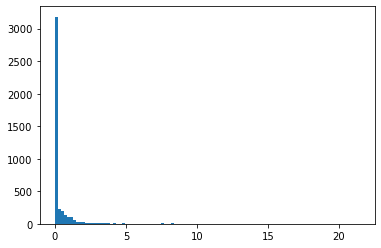

feature:  word_freq_edu


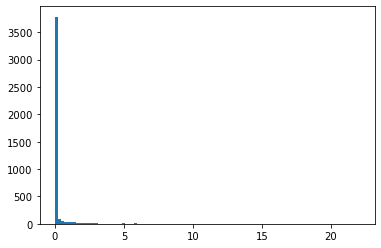

feature:  word_freq_table


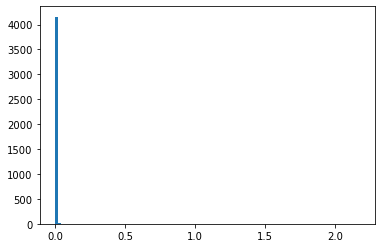

feature:  word_freq_conference


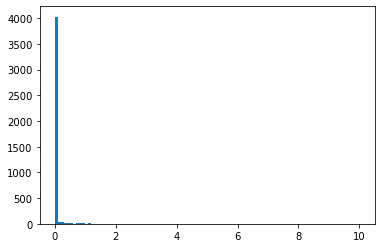

feature:  char_freq_;


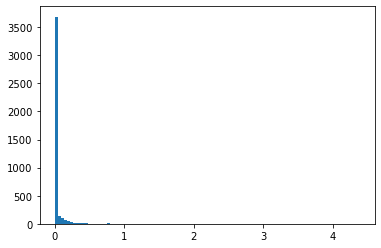

feature:  char_freq_(


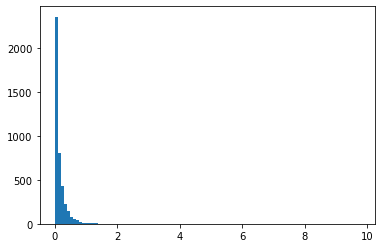

feature:  char_freq_[


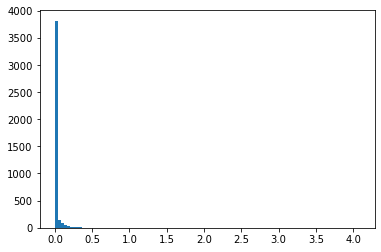

feature:  char_freq_!


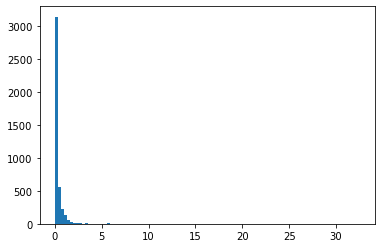

feature:  char_freq_$


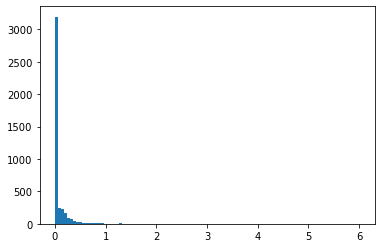

feature:  char_freq_#


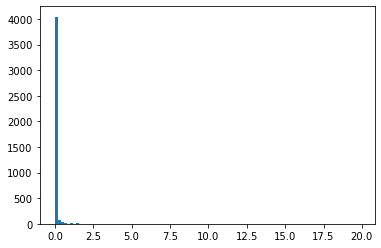

feature:  capital_run_length_average


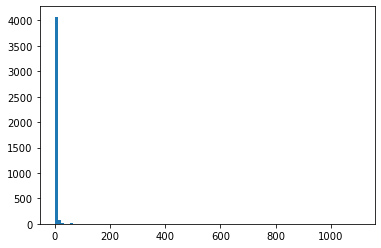

feature:  capital_run_length_longest


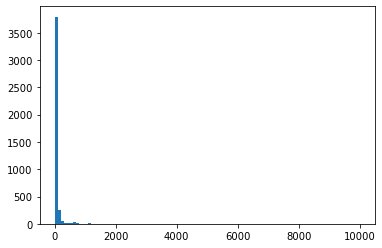

feature:  capital_run_length_total


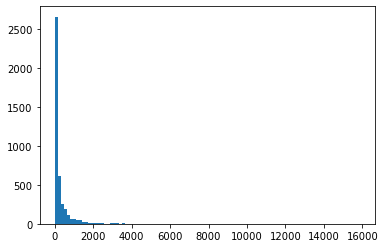

In [5]:
import matplotlib.pyplot as plt
#Creates a histogram of 100 bins for each attribute in the dataset
for i in df.keys()[:-1]: # [:-1] is used to not include the is_spam attribute. Examining it would be trivial as a description of the value composition is given in the set
    print("feature: ",i)
    plt.hist(df.loc[:,i], bins=100)
    plt.show()


Different bin amounts have been tried but due to the quantity and nature of the data, creating as many bins as possible gives a better picture of the distribution. Most values are close to zero

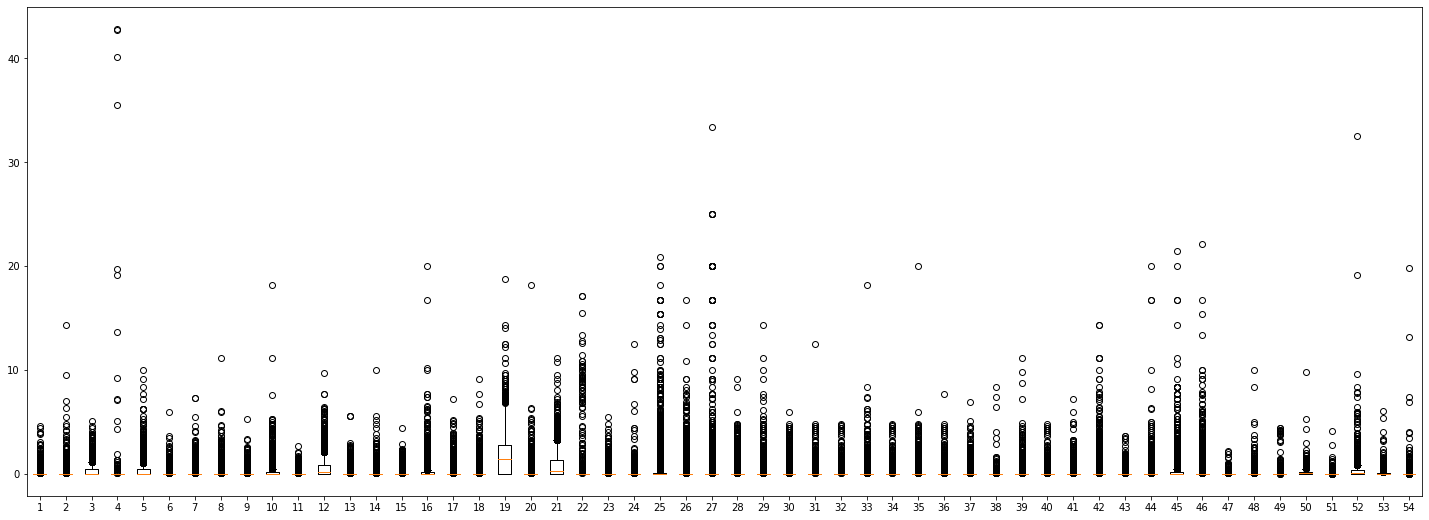

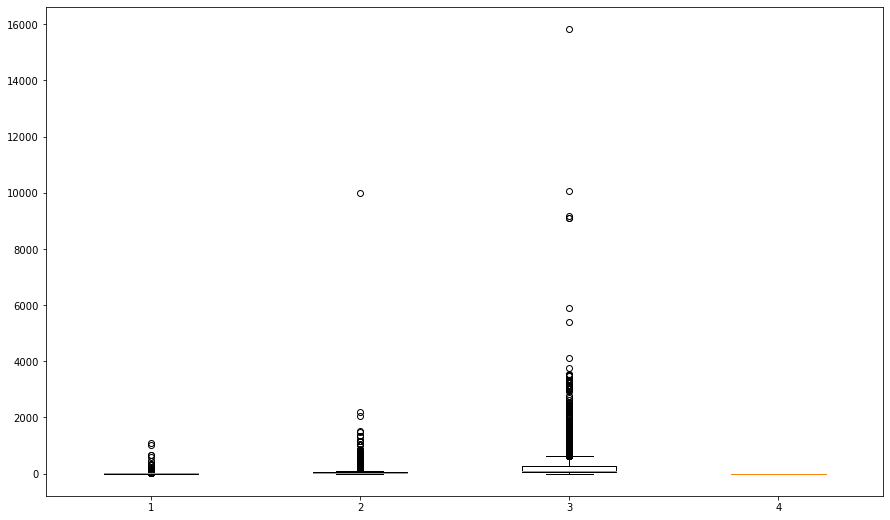

In [6]:
plt.figure(figsize=(25,9)) #Creates a boxplot for all attributes, a wide figsize is used to fit the first 54 attributes which are all similar
plt.boxplot(df.loc[:,:'char_freq_#'])

plt.show()
plt.figure(figsize=(15,9))
plt.boxplot(df.loc[:,'capital_run_length_average':])
plt.show()

A significant amount of outliers exist on every attribute both scattered and concentrated on certain points. One could assume that some of these outlier values are clusters of scam mails, to remove them would be unwise. Some of the outliers are in clusters

# Preprocessing (Binning)

In [7]:
#Two discretizers are set up since the frequencies are different from the last three columns. 
disc1 = preprocessing.KBinsDiscretizer(n_bins = 100,encode = "ordinal",strategy="uniform") #uniform is equal-distance binning
df.loc[:,:'char_freq_#'] = disc1.fit_transform(df.loc[:,:'char_freq_#'].to_numpy())

disc2 = preprocessing.KBinsDiscretizer(n_bins = 5,encode = "ordinal",strategy="uniform")
df.loc[:,'capital_run_length_average':'capital_run_length_total'] = disc2.fit_transform(df.loc[:,'capital_run_length_average':'capital_run_length_total'].to_numpy())

# Calculations
1. Calculate instance space:
    (100^54) * (5^3)
2. Hypothesis space:
    2^(100^54 * 5^3)
3. Hypothesis space with conjunctions:
    2^(101^54 * 6^3)

# Algorithm

In [8]:
#Implementation of alg 4.3 in the course literature
def LGG_comparer_ID(h,x):
    #Keys give both the index and the label, the're sliced away
    for attribute in x.keys()[1:-1]:
        #Acts as a union operation of the two sets
        if x[attribute] not in h[attribute]:
            h[attribute].append(x[attribute])
    return h
         
#An implementation of alg 4.1 in the course literature            
def LGG_trainer_ID(values):
    x = values.loc[0,:]
    #h is instead a dictionary as lists in dataframes are unruly and ineffective
    h = {}
    #Each attribute is given its own dictionary key with an empty list
    for key in values.keys()[1:-1]:
        h[key] = []
    #This is the "while instances left do:" part of the algorithm
    for s,i in values.iterrows():
        x = i
        h = LGG_comparer_ID(h,x)
    return h

#A function to test the model
def test_model_ID(model = pd.Series,trainingset = pd.DataFrame):
    threshhold = len(trainingset.keys()[:-1])
    lst = []
    for index,row in trainingset.iterrows():
        i = -1
        correctness = 0
        #For each attribute in the row, check if any training data had a similar value
        for attribute in row[:-1]:
            i+=1
            if attribute in model[row.keys()[i]]:
                correctness +=1
        #If each attribute of an instance contains a previously seen value, it is identified as spam and its index is stored in an output list
        if correctness >= threshhold:
            lst.append(index)   
    return lst

In [9]:
from sklearn import model_selection

#The concept learner receives all spam
df_spam = df[df['is_spam'] == 1]

#Divided into training and testing data
train,test = sklearn.model_selection.train_test_split(df_spam)

#The index is reset incase any issues arise
train = train.reset_index()

#The nonspam data will used as test data along with 20% of all spam
df_nonspam = df[df.is_spam==0]
#Merge non-spam data with the remaining spam test data and reset index to avoid mishaps.
test = pd.concat([df_nonspam,test]).reset_index()
#Concat creates a new row called index to maintain the merged dataframe's index positions, this is not needed and thus dropped
test.drop('index',inplace=True,axis = 1)


concept = LGG_trainer_ID(train)

#Creates a new column and sets all samples in the returned list to 1, indicating that they were predicted as spam
test.loc[test.index.isin(test_model_ID(concept,test)),'predicted'] = 1
#Fills the rest with 0:s, indicating that they were not identified as spam
test.fillna(0,inplace= True)

#The testing data contains far more non-spam than spam, an algorithm which wouldn't identify anything as spam would roughly have 80% accuracy
print("Accuracy score: ",sklearn.metrics.accuracy_score(test['predicted'],test['is_spam']),"\n") 

print("""Confusion matrix: [true nonspam, false nonspam
                    false spam, true spam] 
""",sklearn.metrics.confusion_matrix(test['predicted'],test['is_spam']),"\n")

#This is a more accurate metric of the model's performance
print("Mean of Precision and Specificity: ",sklearn.metrics.balanced_accuracy_score(test['predicted'],test['is_spam']))


Accuracy score:  0.7400881057268722 

Confusion matrix: [true nonspam, false nonspam
                    false spam, true spam] 
 [[1840   76]
 [ 691  344]] 

Mean of Precision and Specificity:  0.6463505894930057
